In [43]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


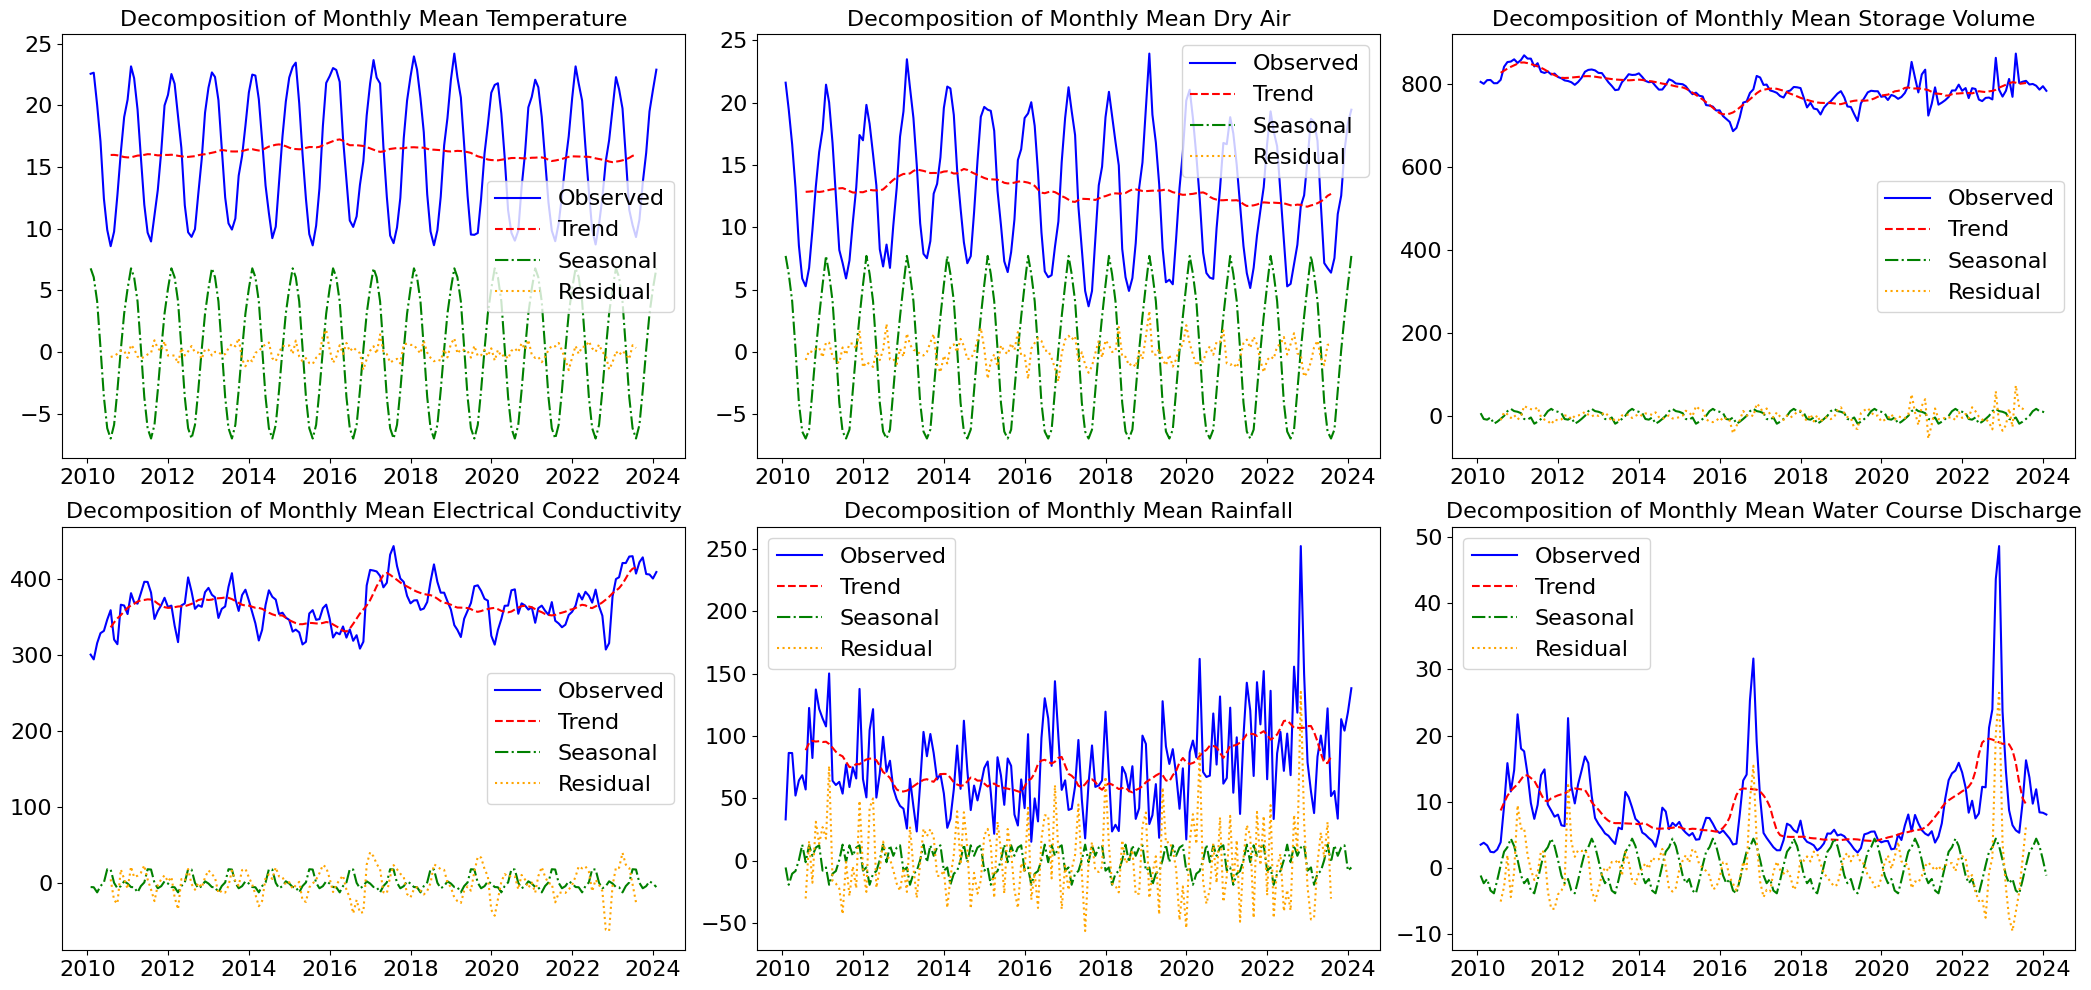

In [55]:
seasonality_effect = {}

# Create a figure and axes for the subplots outside the loop
fig, axs = plt.subplots(2, 3, figsize=(21, 10))  # Adjusted for better visibility
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing to prevent label overlap

plot_row, plot_col = 0, 0  # Initialize subplot indices

for column in exog_monthly_median.columns:
    # Decompose the time series
    decomposed = seasonal_decompose(exog_monthly_median[column], model='additive', period=12)  # assuming monthly data with yearly seasonality

    # Calculate the sum of squares for the seasonal and observed components
    ss_seasonal = (decomposed.seasonal ** 2).sum()
    ss_total = (decomposed.observed ** 2).sum()

    # Proportion of variance explained by the seasonal component
    seasonality_effect[column] = (ss_seasonal / ss_total) * 100

    # Plotting the observed data and components in the specified subplot
    ax = axs[plot_row, plot_col]
    ax.plot(decomposed.observed, label='Observed', color='blue')
    ax.plot(decomposed.trend, label='Trend', color='red', linestyle='--')
    ax.plot(decomposed.seasonal, label='Seasonal', color='green', linestyle='-.')
    ax.plot(decomposed.resid, label='Residual', color='orange', linestyle=':')
    ax.set_title(f'Decomposition of {column}', fontsize=16)  # Increased font size for the title
    ax.legend(loc='best', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)  # Increase axis label size


    # Move to the next subplot position
    plot_col += 1
    if plot_col > 2:
        plot_col = 0
        plot_row += 1

plt.tight_layout()
plt.show()

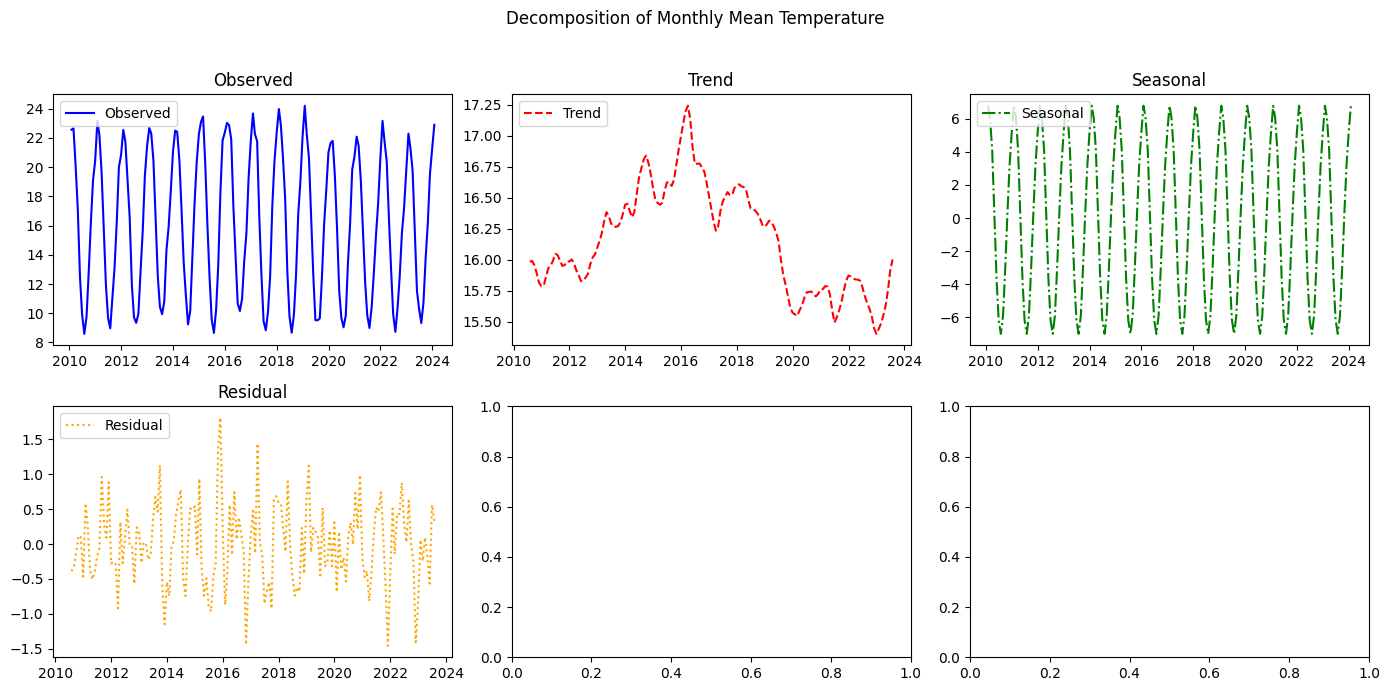

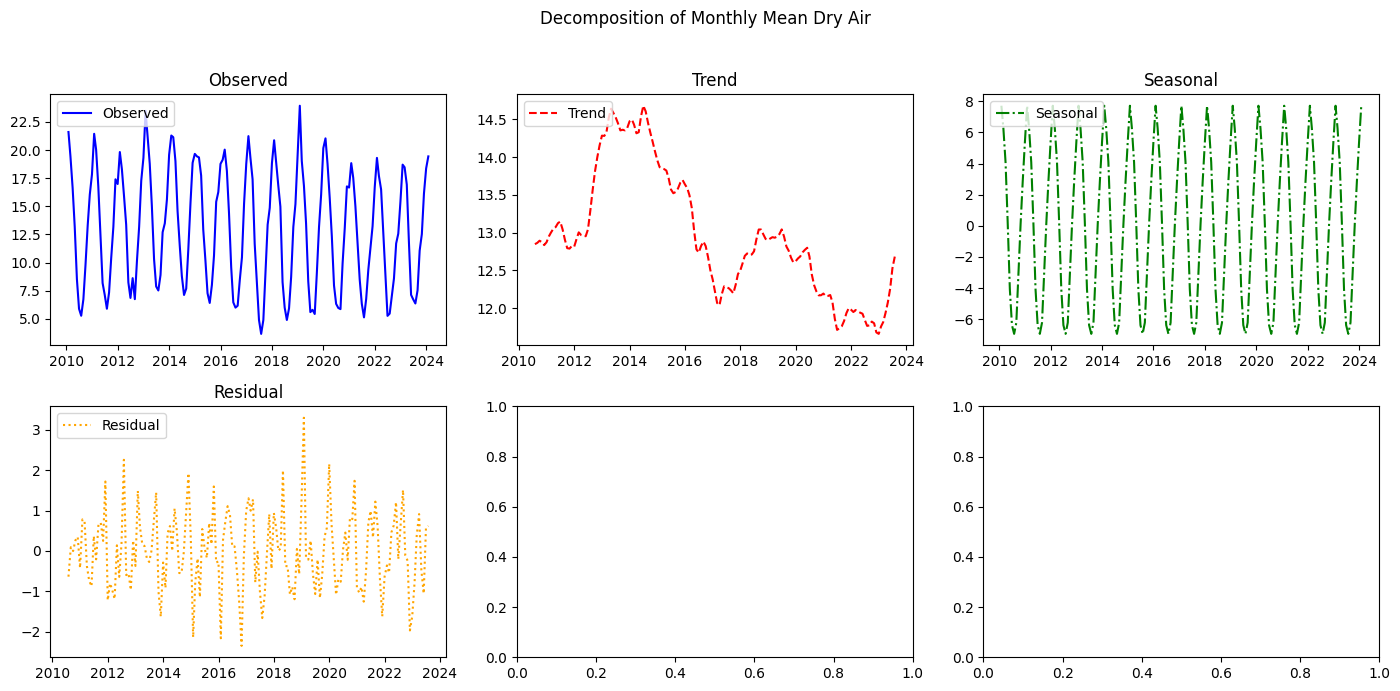

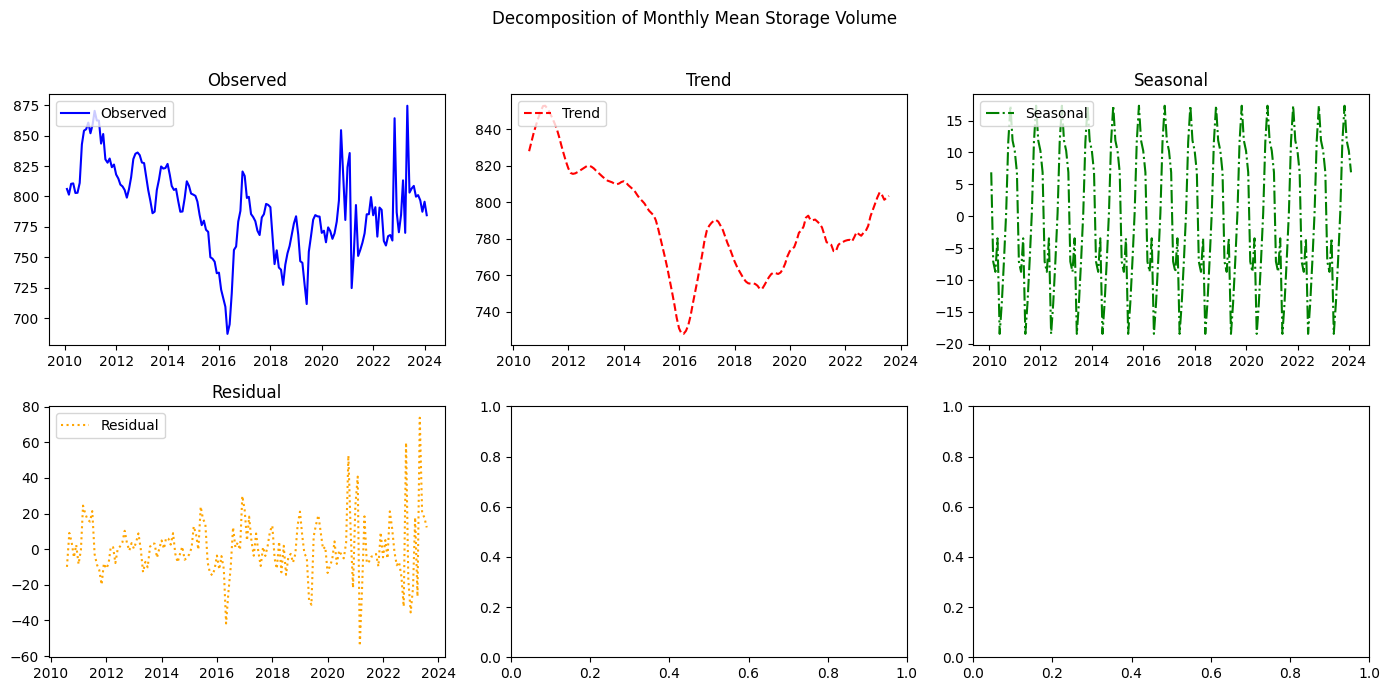

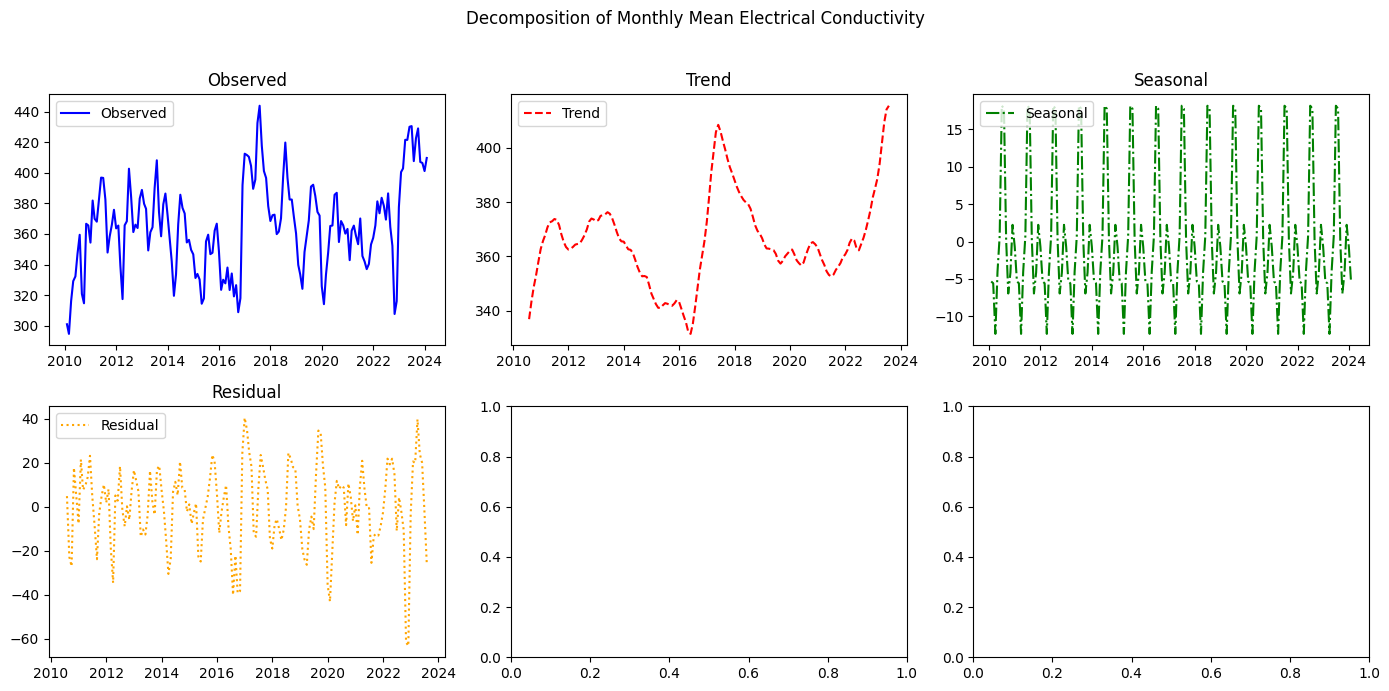

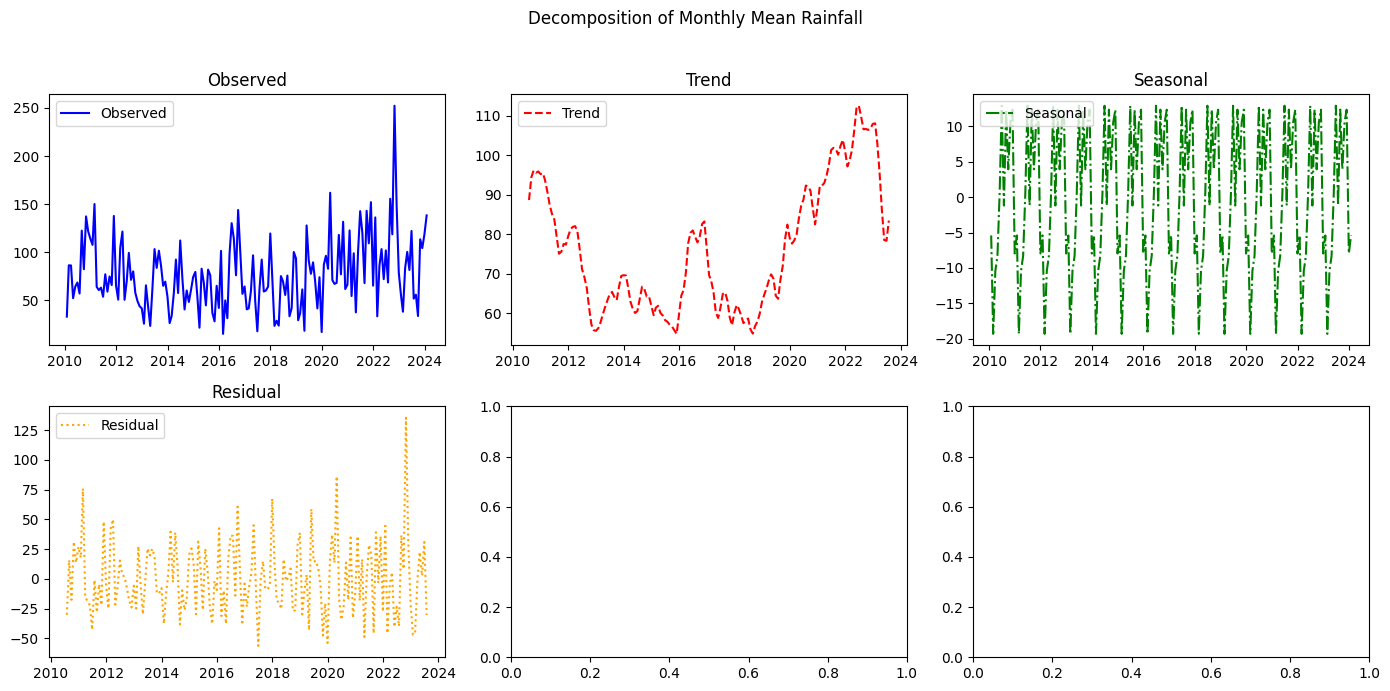

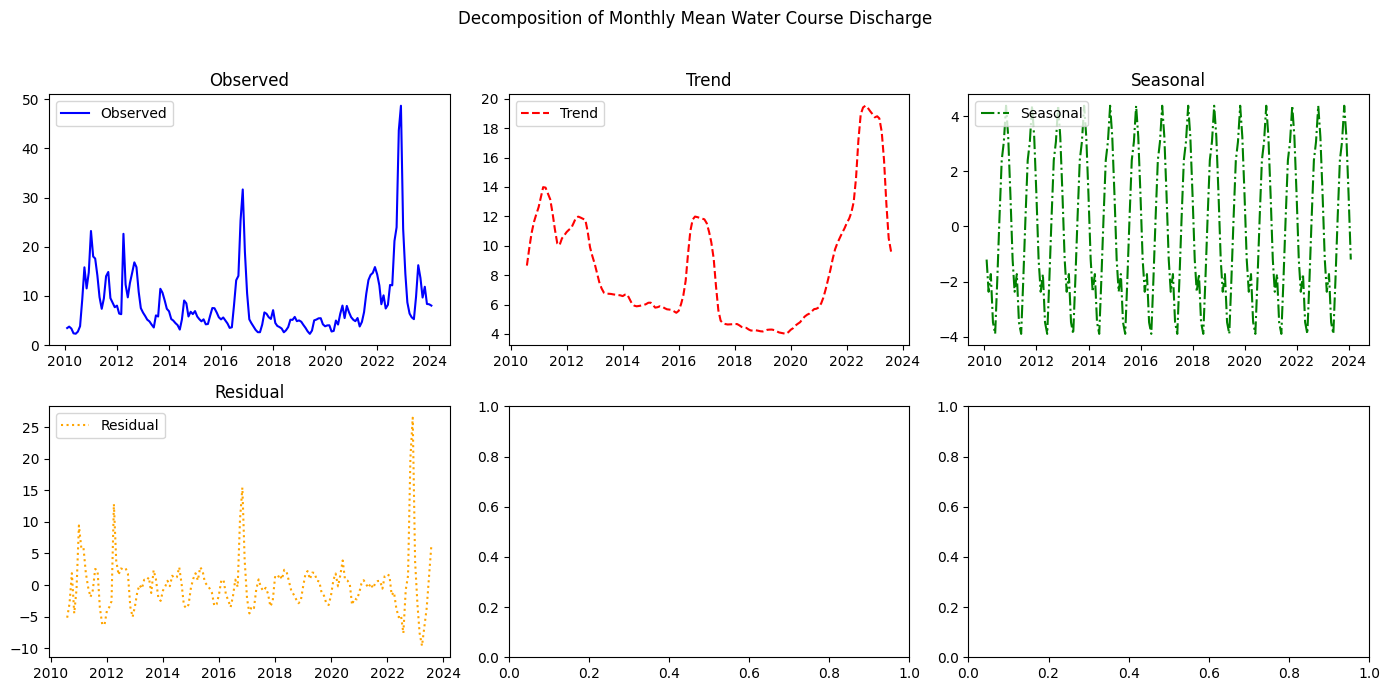

In [45]:
seasonality_effect = {}

for column in exog_monthly_median.columns:
    # Decompose the time series
    decomposed = seasonal_decompose(exog_monthly_median[column], model='additive', period=12)  # assuming monthly data with yearly seasonality

       # Calculate the sum of squares for the seasonal and observed components
    ss_seasonal = (decomposed.seasonal ** 2).sum()
    ss_total = (decomposed.observed ** 2).sum()

    # Proportion of variance explained by the seasonal component
    seasonality_effect[column] = (ss_seasonal / ss_total) * 100



    # Plotting the observed data and components
    plt.figure(figsize=(14, 7))
    plt.suptitle(f'Decomposition of {column}')

    # Plot the observed data
    plt.plot(decomposed.observed, label='Observed', color='blue')

    # Plot the trend component
    plt.plot(decomposed.trend, label='Trend', color='red', linestyle='--')

    # Plot the seasonal component
    plt.plot(decomposed.seasonal, label='Seasonal', color='green', linestyle='-.')

    # Plot the residual component
    plt.plot(decomposed.resid, label='Residual', color='orange', linestyle=':')

    # Add a legend
    plt.legend(loc='upper left')

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

In [46]:
# Convert the dictionary to a DataFrame for better visualization
# Convert the dictionary to a DataFrame for better visualization
seasonality_table = pd.DataFrame(list(seasonality_effect.items()), columns=['Variable', 'Seasonality Effect (%)'])
print(seasonality_table)

                               Variable  Seasonality Effect (%)
0              Monthly Mean Temperature                8.232955
1                  Monthly Mean Dry Air               13.120156
2           Monthly Mean Storage Volume                0.019220
3  Monthly Mean Electrical Conductivity                0.058204
4                 Monthly Mean Rainfall                1.433109
5   Monthly Mean Water Course Discharge                6.270994
